# COMP 3400 Project 1

Keenan Nicholson 201632668

Kunal Sikka 202028189

## The Dataset

The following dataset (https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) captures the details of how CO2 emissions by a vehicle can vary with the different features (i.e., engine size, four-wheel drive or two-wheel drive, fuel type, transmission type). The dataset has been taken from Canada Government official open data website and contains data over a period of 7 years. There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features which are detailed below.

Understanding the Data:
* **Model:** 
    - 4WD/4X4 = Four-wheel drive
    - AWD = All-wheel drive
    - FFV = Flexible-fuel vehicle
    - SWB = Short wheelbase
    - LWB = Long wheelbase
    - EWB = Extended wheelbase

* **Transmission:** 
    - A = automatic = automated manual
    - AS = automatic with select shift
    - AV = continuously variable
    - M = manual, 3 - 10 = Number of gears

* **Fuel type:** 
    - X = regular gasoline
    - Z = premium gasoline
    - D = diesel
    - E = ethanol (E85)
    - N = natural gas

* **Fuel consumption:**
    - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

* **CO2 emissions:** 
    - the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving
 

In this project we will be analyzing fuel efficiency and CO2 emissions of vehicles investigate how features such as transmission type, fuel type and engine size effect a vehicles efficiency. Additionally, we wish to predict the fuel efficiency and emisions of a vehicle based on several given attributes. Listed below are the variables we will be using in our investigation and why we have chosen to use these variables.


    
In this dataset we will be analysing with respect to the following 12 variables:
* **Make:** The manufacturer brand of the vehicle which will allow for a comparison efficiency and emissions between manufacturers.

* **Model:** The specific vehicle model which allows us to analyze how different features can effect the fuel efficiency and CO2 emissions output of the same make and model of car (i.e., manual transmission versus automatic transmission in honda civics).

* **Vehicle Class:** The vehicle size class (compact, SUV, mid-size etc) can be used as a direct comparison between classes or to see which make creates the most fuel efficient and environmentally friendly vehicle by class.

* **Engine Size(L):** The volume of the engine in litres - a feature which can be used to compare the fuel efficiency and CO2 emissions of a vehicle with respect to a change in engine size. This comparison can be simply pitting engine sizes, or engine sizes with respect to other variables such as make or model against each other.

* **Cylinders:** The number of engine cylinders - a feature which can be used to analyze how a change in the number of cylinders effects vehicle efficiency and CO2 emissions. Similar to engine size we may wish to refine our analysis and examine the difference the number of cylinders has on the same make and model of car.

* **Transmission:** The type of transmission in the vehicle a feature which can be used to compare the fuel efficiency and CO2 emissions of a vehicle with respect to a change in transmission. Again, we can produce a more meaningful analysis of the dataset by comparing by model and make as well as independently.

* **Fuel Type:** Type of fuel used to power vehicle may be used in an independent analysis to see which fuel type has the greatest effiency, or which make produces the most fuel effient or environmentally friendly vehicles by fuel type. 

* **Fuel Consumption City(L/100 km):** The fuel consumption of the vehicle measured in litres per 100 kilometers while driving in a city environment will be used to help calculate trends between fuel consumption and CO2 emissions, and used along side the other traits for helping predict the level of CO2 emissions outputed by a vehicle with certain traits.

* **Fuel Consumption Hwy(L/100 km):** The fuel consumption of the vehicle measured in litres per 100 kilometers while driving on the highway will be used to help calculate trends between fuel consumption and CO2 emissions, and used along side the other traits for helping predict the level of CO2 emissions outputed by a vehicle with certain traits.

* **Fuel Consumption Comb(L/100 km):** The fuel consumption of the vehicle measured in litres per 100 kilometers while used for both city and highway driving will be used to help calculate trends between fuel consumption and CO2 emissions, and used along side the other traits for helping predict the level of CO2 emissions outputed by a vehicle with certain traits.

* **Fuel Consumption COMP(mpg):** The fuel consumption of the vehicle measured in miles per gallon while used for both city and highway driving will be used to help calculate trends between fuel consumption and CO2 emissions, and used along side the other traits for helping predict the level of CO2 emissions outputed by a vehicle with certain traits.

* **CO2 Emissions(g/km):** The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving will be used to help build a training dataset which we can use to help predict the CO2 emissions of vehicles in similar datasets with missing variables.


## Setup and Initial Analysis

To begin our analysis we will check for anomalies in the dataset. To do this we will generate some summary statistics of the continuous data using df.describe() then generate further information on the dataset including the nominal attributes. We will then help visualize the data with box plots and histograms to gain insight on the shape and distribution of the dataset, as well as spot any outliers. We can see from the information and statistics generated below that we do not seem to have any missing data from out dataset, all attributes have 7385 cells. In the statistical analysis the means are about the halfway point between minimum and maximums for each variable and the standard deviations are reasonable, thus there are not any obvious outliers.

In [13]:
import pandas as pd
import numpy as np
import random as r
import matplotlib.pyplot as plt

df = pd.read_csv("CO2 Emissions_Canada.csv").sort_index() # Reading the csv into a pandas dataframe and sorting by make
display(df)

statistics = df.describe()[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
info = df.info() # generating some basic statistics about the dataset using pandas dataframe describe method

display(statistics)
display(info)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,12.556534,9.041706,10.975071,250.584699
std,3.500274,2.224456,2.892506,58.512679
min,4.200000,4.000000,4.100000,96.000000
25%,10.100000,7.500000,8.900000,208.000000
50%,12.100000,8.700000,10.600000,246.000000
75%,14.600000,10.200000,12.600000,288.000000
max,30.600000,20.600000,26.100000,522.000000


None

## Graphing the continuous data

We will begin with some boxplots of the continuous data to help spot any outliers. As we can see from the boxplots there are quite a few outliers, however, from the dataset we can see there are some vehicles manufactured by companies that produce high-end sports cars so these outliers may well be explained by being super cars that focus on performance rather than efficiency. Next, lets plot the distribution of the continuous data using histograms. From these we can see that the data distribution is fairly nice, with a slight right skew (tail to the right, data mostly center-left). But we can see again that we do not have any major outliers. There are no significant gaps between the data distribution, so the large numbers that we suspected as being outliers in the boxplots are further justified to simply be cars that were manufactured for the purpose of performance over efficiency.

<AxesSubplot:>

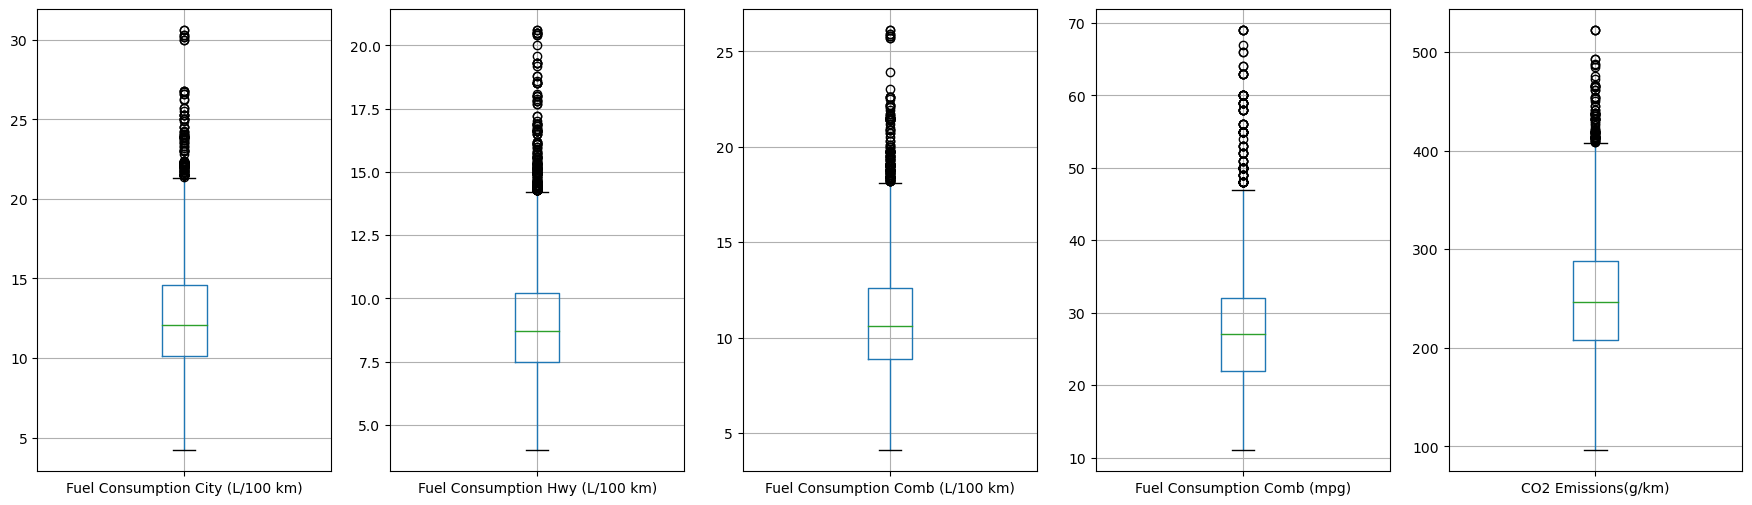

In [14]:
fig, (axs1,axs2,axs3,axs4,axs5) = plt.subplots(1,5,figsize=(22,6)) # set the size of the graph

df.boxplot(['Fuel Consumption City (L/100 km)'], ax=axs1)
df.boxplot(['Fuel Consumption Hwy (L/100 km)'], ax=axs2)
df.boxplot(['Fuel Consumption Comb (L/100 km)'], ax=axs3)
df.boxplot(['Fuel Consumption Comb (mpg)'], ax=axs4)
df.boxplot(['CO2 Emissions(g/km)'], ax=axs5)



<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}, ylabel='Frequency'>

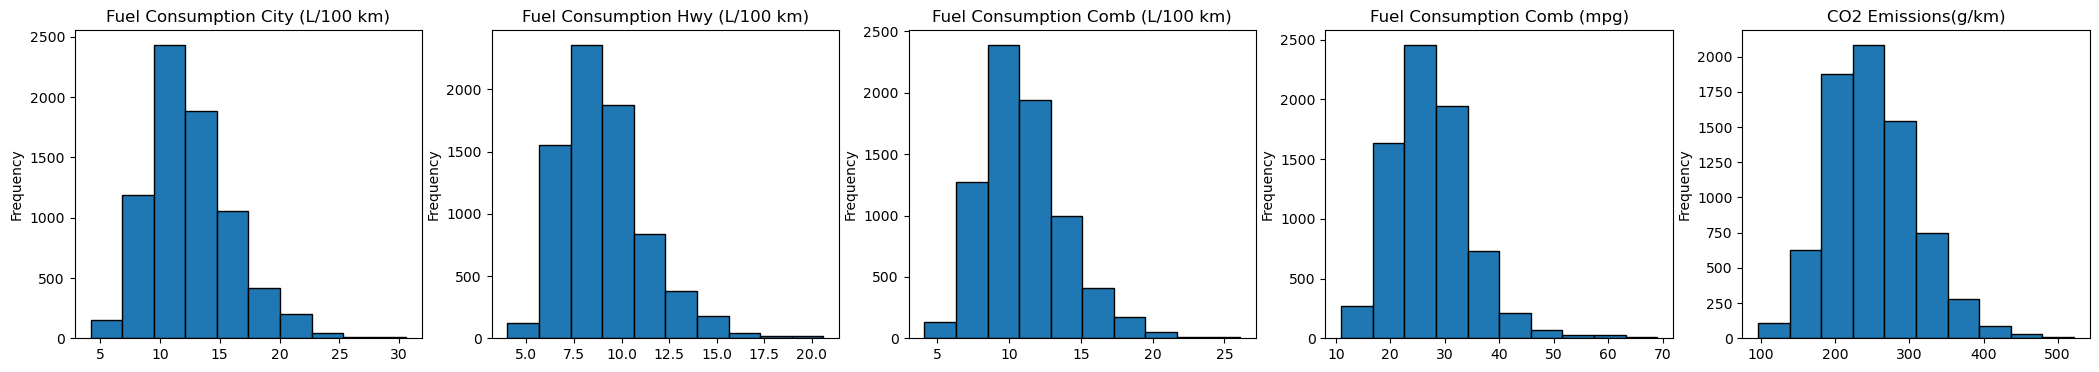

In [15]:
fig, (axs1,axs2,axs3,axs4,axs5) = plt.subplots(1,5,figsize=(26,4)) # set the size of the graph

df.plot.hist(y=7,title = 'Fuel Consumption City (L/100 km)', legend =False,ax=axs1, ec='k')
df.plot.hist(y=8,title = 'Fuel Consumption Hwy (L/100 km)', legend =False,ax=axs2, ec='k')
df.plot.hist(y=9,title = 'Fuel Consumption Comb (L/100 km)', legend =False,ax=axs3, ec='k')
df.plot.hist(y=10,title = 'Fuel Consumption Comb (mpg)', legend =False,ax=axs4, ec='k')
df.plot.hist(y=11,title = 'CO2 Emissions(g/km)', legend =False,ax=axs5, ec='k')

## Graphing the nominal data

Next lets take a look at how the nominal data is laid out. For this we will ignore the boxplots as they do not provide useful insight in the case of our categorical data. First, lets make some bar charts that show the number of elements of each nominal attribute (we omit vehicle class as there are far too many to be of any use when graphed, it just becomes a jumbled mess). From these graphs we can gather that the majority of vehicles tested were in the small to medium vehicle range, most likely every day drivers which is what we would expect to see in a country such as Canada. The most common fuel types are by far regular (X) and premium (Z) gas. Our distribution of vehicle makes is as expected, with the larger more Canadian accessible companies such as Ford, BMW, Chevrolet and so on having more vehicles in the dataset than the smaller competitors. The 2L engine size is the most popular by about 600 vehicles. The 4 cylinder is the most popular engine, which is what we expect to see as most 2L engines are 4 cylinder. The most common transmissions are the 6-speed manual (M6), the automatic select shift 8-speed (AS8) and the automatic select shift 6-speed (AS6). In short, the nominal attributes do not seem to have any odd behaviour and are as expected for a Canadian vehicle study.

<AxesSubplot:title={'center':'Ratio of Vehicle Transmission Types'}, ylabel='Transmission'>

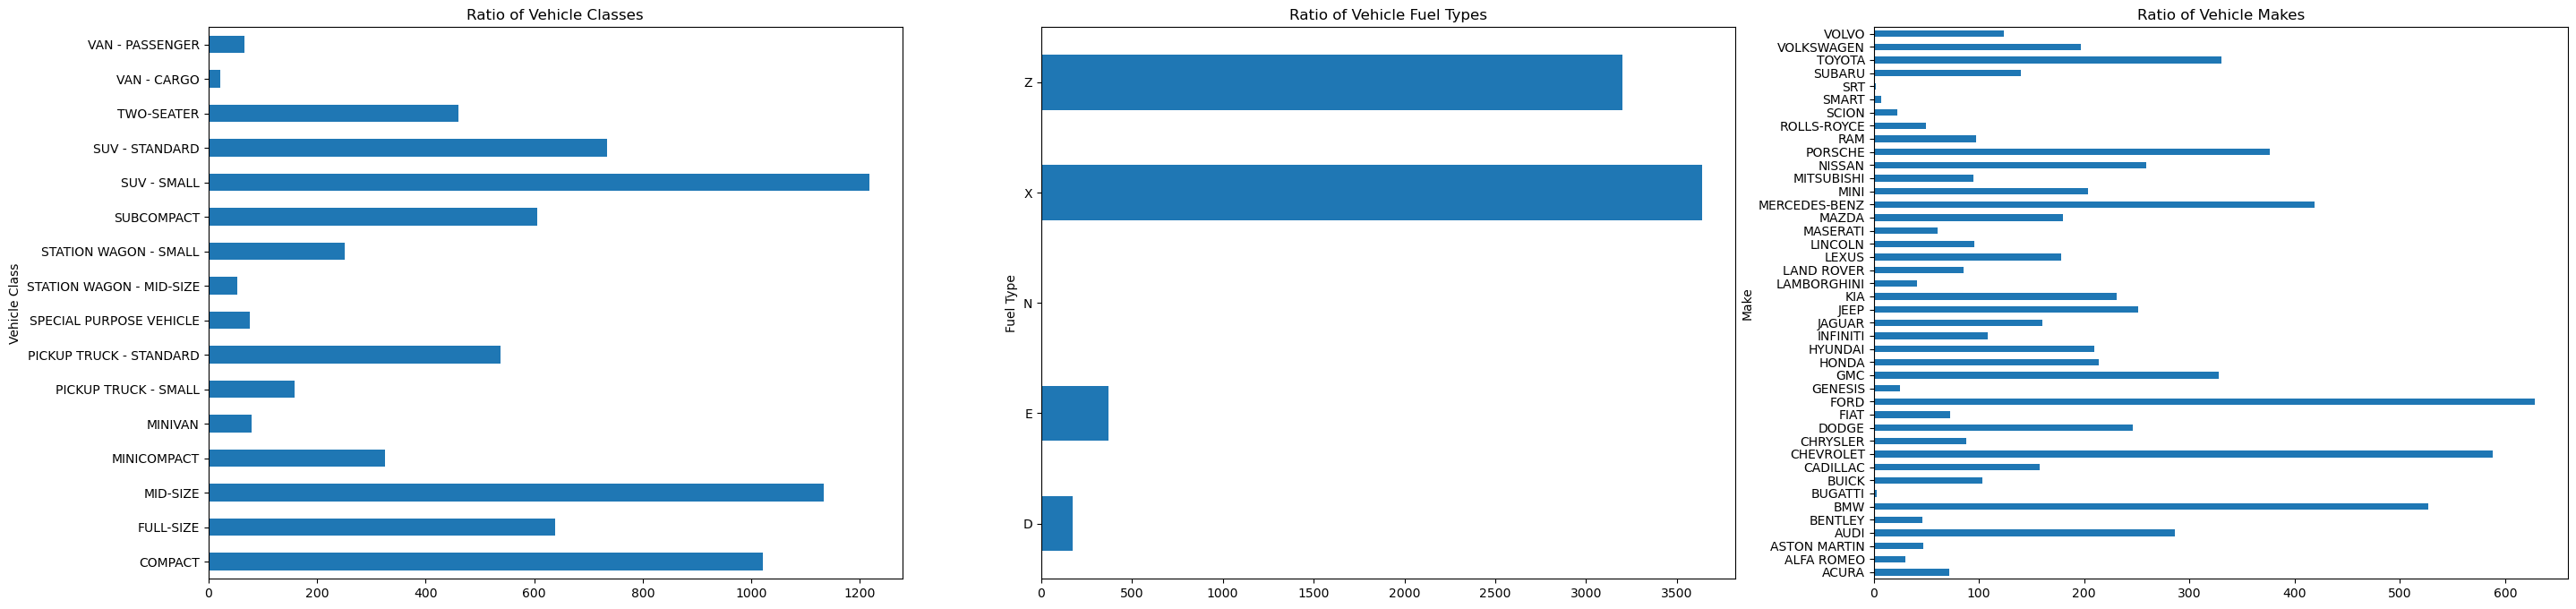

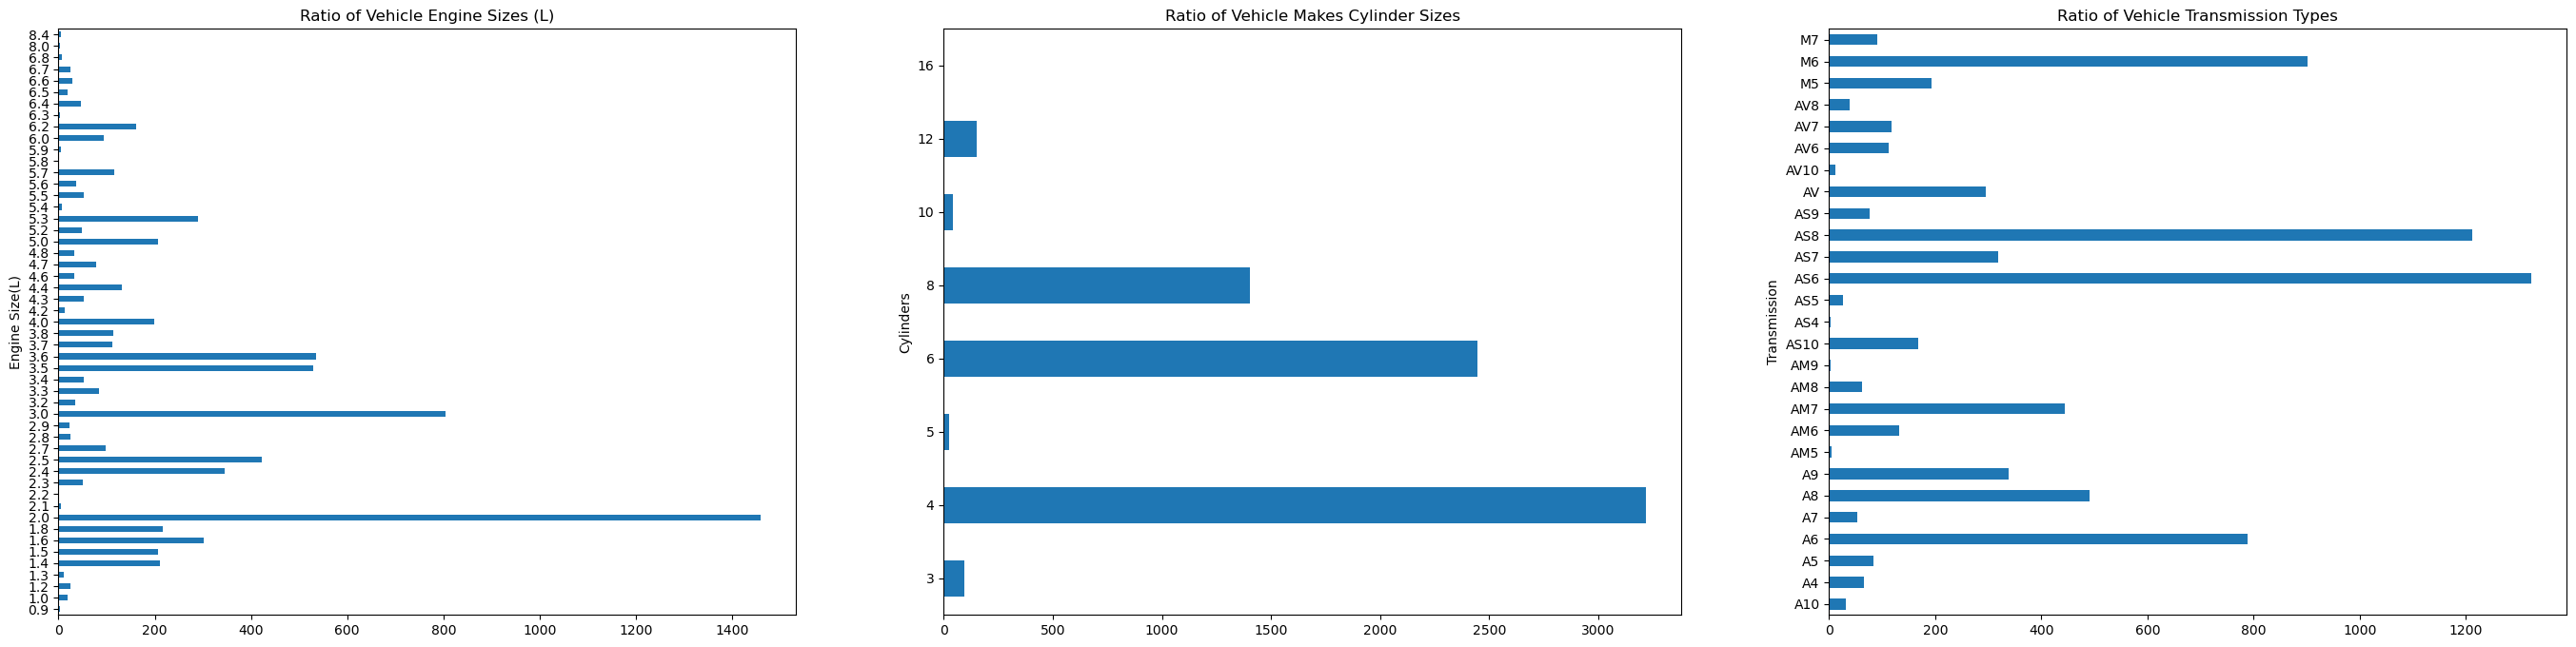

In [16]:
fig, (axs1,axs2,axs3) = plt.subplots(1,3,figsize=(34,8))


df.groupby('Make').agg({'Make' : ['count']}).plot(kind='barh',y='Make',title="Ratio of Vehicle Makes", legend = False, ax=axs3)
df.groupby('Fuel Type').agg({'Fuel Type' : ['count']}).plot(kind='barh',y='Fuel Type',title="Ratio of Vehicle Fuel Types", legend = False, ax=axs2)
df.groupby('Vehicle Class').agg({'Vehicle Class' : ['count']}).plot(kind='barh',y='Vehicle Class',title="Ratio of Vehicle Classes", legend = False, ax=axs1)

fig, (axs4,axs5,axs6) = plt.subplots(1,3,figsize=(34,8))

df.groupby('Engine Size(L)').agg({'Engine Size(L)' : ['count']}).plot(kind='barh',y='Engine Size(L)',title="Ratio of Vehicle Engine Sizes (L)", legend = False, ax=axs4)
df.groupby('Cylinders').agg({'Cylinders' : ['count']}).plot(kind='barh',y='Cylinders',title="Ratio of Vehicle Makes Cylinder Sizes", legend = False, ax=axs5)
df.groupby('Transmission').agg({'Transmission' : ['count']}).plot(kind='barh',y='Transmission',title="Ratio of Vehicle Transmission Types", legend = False, ax=axs6)

## Creating Artificial Anomalies

As we can see from the plots above, the data is distributed fairly uniformly, with the exception of a couple outliers. These outliers, however, can be justified as being vehicles which are made by manufacturers that cater to the high-performance/luxury sports car market such as Bugatti and Lamborghini. These cars will focus more on the performance of their cars rather than the efficiency thus we accept these anomalies.

Now then, since our dataset behaves nicely and does not have any outliers that cannot be justified, we must create them! First we will create some missing values. To do so we randomly select and delete the data in 10% of entries from both the 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions(g/km)' columns. Next, we will randomly generate some outliers by randomly selecting data and multiplying it by a random integer between 3 and 5 in the 'CO2 Emissions' column and a random integer between 5 and 7 in the 'Fuel Consumption Comb (L/100 km)' column. The reasoning for these ranges is that it creates noticeable outliers without being so outlandish that the graphs become unreadable. Since we are allowing some "outliers" if they are explained as simply being due to different features and focus of high-performance car manufacturers, we will say that these artificial outliers that we are creating come from human error and faulty measuring equipment. For example, perhaps the person measuring the fuel before and after fuel consumption testing made a mistake, or that one of the CO2 emissions measuring device was not calibrated correctly and created bad data when used throughout the testing.

In [17]:

"""deletes a random 10% of 'Fuel Consumption Comb (L/100 km) and 'CO2 Emissions(g/km) columns"""
rowsDeleteEmissions = [] # Store the rows we already did so we don't have repeated skewing
rowsDeleteFuel = [] # Store the rows we already did so we don't have repeated skewing
countEmissions = 0
countFuel =0

while countEmissions < int(df.shape[0]*.10):
    countEmissions +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsDeleteEmissions:
        continue
    else:
        df.at[row, 'CO2 Emissions(g/km)'] = None
        rowsDeleteEmissions.append(row)


while countFuel< int(df.shape[0]*.10):
    countFuel +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsDeleteFuel:
        continue
    else:
        df.at[row, 'Fuel Consumption Comb (L/100 km)'] = None
        rowsDeleteFuel.append(row)



"""deletes a random 3% of 'Fuel Consumption Comb (L/100 km) and 'CO2 Emissions(g/km) columns"""
rowsOutlierEmissions = [] # Store the rows we already did so we don't have repeated skewing
rowsOutlierFuel = [] # Store the rows we already did so we don't have repeated skewing

countOutlierEmissions=0
countOutlierFuel=0

while countOutlierEmissions < int(df.shape[0]*.03):
    countOutlierEmissions +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsOutlierEmissions:
        continue
    else:
        df.at[row, 'CO2 Emissions(g/km)'] *= r.randint(3,5)
        rowsOutlierEmissions.append(row)

while countOutlierFuel < int(df.shape[0]*.03):
    countOutlierFuel +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsOutlierFuel:
        continue
    else:
        df.at[row, 'Fuel Consumption Comb (L/100 km)'] *= r.randint(5,7)
        rowsOutlierFuel.append(row)

Now that we have created some anomalies, lets re-run our tests to confirm. First we will check the some statistics with Pandas describe(). As we can see after rerunning our test with the dirty dataset, the mean is much less reasonable, as for both 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions (g/km)' it much smaller than what we would expect if the data was distributed nicely. Likewise, the standard devation of the two columns with skewed data are much larger than we might expect. Next, lets recreate the scatter plot from above and create a boxplot of each of the two columns with outliers.

In [18]:
statisticsSkewed = df.describe()[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']] # generating some basic statistics about the dataset using pandas dataframe describe method
display(statisticsSkewed)

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,6685.000000,6684.000000
mean,12.556534,9.041706,12.672491,273.606074
std,3.500274,2.224456,10.613306,151.210058
min,4.200000,4.000000,4.100000,96.000000
25%,10.100000,7.500000,9.000000,209.000000
50%,12.100000,8.700000,10.700000,248.000000
75%,14.600000,10.200000,12.800000,293.000000
max,30.600000,20.600000,144.900000,1980.000000


## Graphing the artificial outliers: box plots

After plotting the two attributes with artificial anomalies below, we can see nwo that there are much more datapoints outside of the inner quartile range, as well, the values are no longer justifiable. A vehicle using more than 120 l/100km and producing almost 2500 g/km of CO2 emissions is impossible (a quick google search reveals that the least fuel efficient car ever is the 1986 Lamborghini Countach at 33.6 l/100kms https://driving.ca/features/feature-story/worst-gas-guzzlers-of-all-time), so it is likely that there were errors with either the measuring equipment, human error when measuring, or both.

<AxesSubplot:>

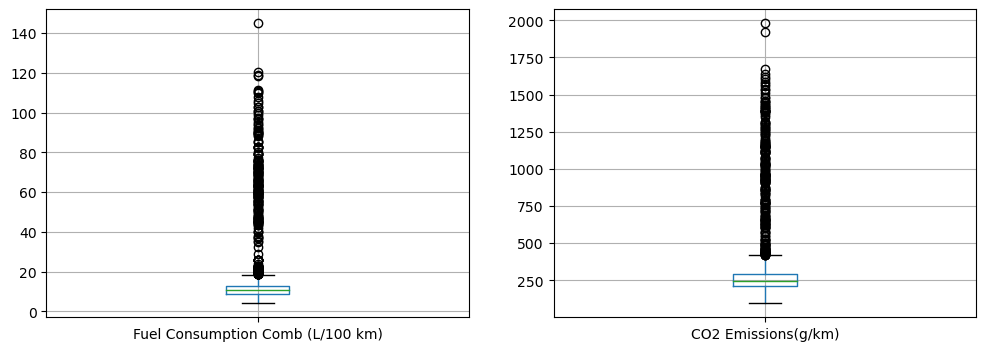

In [19]:
fig, (axs1,axs2) = plt.subplots(1,2,figsize=(12,4)) # set the size of the graph

df.boxplot(['Fuel Consumption Comb (L/100 km)'], ax=axs1)
df.boxplot(['CO2 Emissions(g/km)'], ax=axs2)

## Graphing the artificial outliers: histograms

The histograms further back up the fact that the dataset now has outliers as the distribution is completely one sided, with almost all the data being on the low side, and very few in the upper range. Likewise, now we can see gaps between the data's distribution, there are no cars with a fuel consumption between ~30 and ~42 l/100km.

<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}, ylabel='Frequency'>

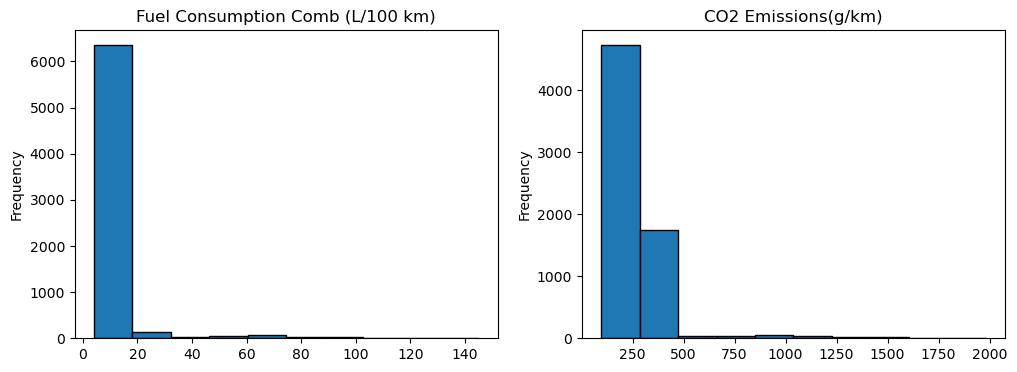

In [20]:
fig, (axs1,axs2) = plt.subplots(1,2,figsize=(12,4)) # set the size of the graph

df.plot.hist(y=9,title = 'Fuel Consumption Comb (L/100 km)', legend =False,ax=axs1, ec='k')
df.plot.hist(y=11,title = 'CO2 Emissions(g/km)', legend =False,ax=axs2, ec='k')

## Cleaning the Data

As expected, there are now some outliers, although the outliers are arranged in a somewhat uniform fashion, this is explained as the faulty measuring equipment being off by a consistent amount throughout the years of testing.

Since we have created a skewed dataset, it is time to show that we know how to deal with the anomalies. When dealing with heavily skewed datasets as we have here, it is common to identify and remove outliers using the interquartile range. We begin by removing all rows that contain a missing value with Pandas dropna() function. Because this data does not seem to have a normal distribution, it may be best that we ignore methods of removing outliers such as z-score or standard deviations. Viewing the box plots, we see that almost all of the outliers are outside of the upper-quartile. We might be tempted to remove everything outside the upper quartile, however, we know there were already some explainable phenomena that were outside of this range to begin with from the super car industry. To reduce the amount of useful data loss, we may want to push that range up to say the 90%. 

In [21]:
df = df.dropna() # drop rows with at least 1 NaN cell



lowQFuel = df['Fuel Consumption Comb (L/100 km)'].quantile(0.10) # get the lower quantile for the fuel consumption comb column
upperQFuel = df['Fuel Consumption Comb (L/100 km)'].quantile(0.90) # get the upper quantile for the fuel consumption comb column

lowQEmiss = df['CO2 Emissions(g/km)'].quantile(0.10) # get the lower quantile for the CO2 emissions
upperQEmiss = df['CO2 Emissions(g/km)'].quantile(0.90) # get the upper quantile for the fuel CO2 emissions


IQRFuel = upperQFuel-lowQFuel # Get the interquantile range for the fuel consumption comb column
IQREmiss = upperQEmiss-lowQEmiss # Get the interquantile range for the CO2 emissions column

lowFenceFuel = lowQFuel-1.5*IQRFuel  # Get the lower fence for the fuel consumption comb column
highFenceFuel = upperQFuel+1.5*IQRFuel # Get the upper fence for the fuel consumption comb column

lowFenceEmiss = lowQEmiss-1.5*IQREmiss  # Get the lower fence for the fuel CO2 emissions column
highFenceEmiss = upperQEmiss+1.5*IQREmiss # Get the upper fence for the fuel CO2 emissions column

df = df.loc[(df['Fuel Consumption Comb (L/100 km)'] > lowFenceFuel) & (df['Fuel Consumption Comb (L/100 km)'] < highFenceFuel)] # remove the rows with datapoints outside the IQR for fuel consumption column
df = df.loc[(df['CO2 Emissions(g/km)'] > lowFenceEmiss) & (df['CO2 Emissions(g/km)'] < highFenceEmiss)] # remove the rows with datapoints outside the IQR for fCO2 emissions column


display(df)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0


Let's run statistics and graph the results after cleaning:

In [22]:
statisticsCleaned = df.describe()[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']] # generating some basic statistics about the dataset using pandas dataframe describe method
display(statisticsCleaned)

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,5697.000000,5697.000000,5697.000000,5697.000000
mean,12.573214,9.056925,10.991434,251.642794
std,3.521155,2.235956,2.909031,59.765401
min,4.200000,4.000000,4.100000,96.000000
25%,10.100000,7.500000,9.000000,209.000000
50%,12.100000,8.700000,10.600000,246.000000
75%,14.600000,10.200000,12.600000,289.000000
max,30.600000,20.600000,26.100000,573.000000


<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}, ylabel='Frequency'>

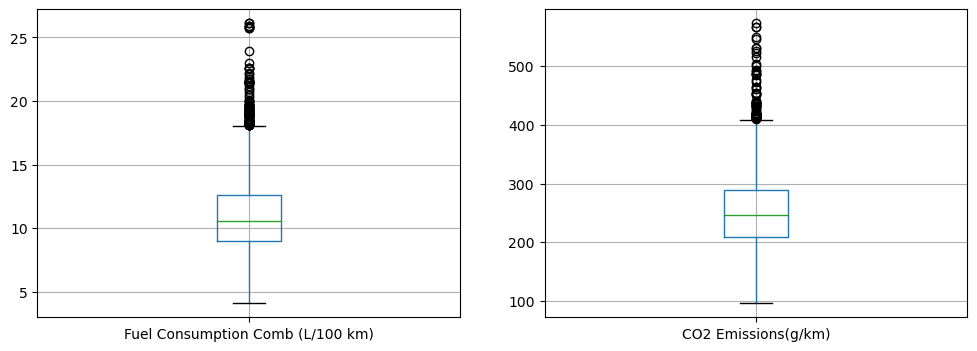

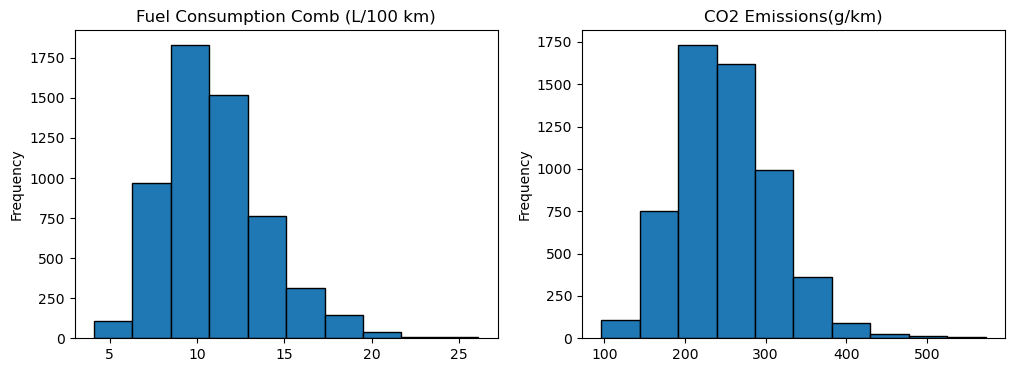

In [23]:
fig, (axs1,axs2) = plt.subplots(1,2,figsize=(12,4)) # set the size of the graph

df.boxplot(['Fuel Consumption Comb (L/100 km)'], ax=axs1)
df.boxplot(['CO2 Emissions(g/km)'], ax=axs2)

fig, (axs1,axs2) = plt.subplots(1,2,figsize=(12,4)) # set the size of the graph

df.plot.hist(y=9,title = 'Fuel Consumption Comb (L/100 km)', legend =False,ax=axs1, ec='k')
df.plot.hist(y=11,title = 'CO2 Emissions(g/km)', legend =False,ax=axs2, ec='k')

Referring to our cleaned statistics and a quick visual diagnosis of the plots, we see we have cleaned the data while keeping some of the acceptable "outlier" datapoints such as those from the super car companies. The distributions of the data we cleaned are now much more readable and believable. We see we have a slight skew right with the majority of the data center-left which is on trend with the rest of our dataset. While cleaning we removed about 1600 rows of data from out original 7385, which is approximately 23% of our original dataset, exactly as intended.

## Iteration 2: Part 2

To begin we will encode the string data using a one hot encoder. We do not use ordinal or label encoding as both enforce too much order in the encoding. 

Next, we scale the continuous data using multiple techniques to determine which one looks like it may be the best for training our model. The techniques we implement are listed below:

* Min/Max 
* Max Abs 
* Log 
* Robust 
* Quantile Transform 
* Z-Score

and although we do not have an enormous amount of data, let's take a look at two discretization methods as well:

* Uniform or equal width Discretization
* Quantile or equal frequency Discretization

Now that we have graphed the data with each scaling technique, let's discuss which one will work best with our model. First, we note that since none of our scaled data has negative values, we do not need to limit ourself to scaling techniques such as maxAbs that scale with respect to negative inputs. Min/Max, maxAbs and Robust scaling all produced histograms with a right-skewed distribution for each of our attributes. Moreover, they do not seem to handle the anomalies we have in our dataset, such as the supercar companies, extremely well as we see some data very close to 1, but the vast majority are grouped around 0.3. Next, we look at quantile normalization which as expected does not offer a very good representation of our dataset. This may be do to quantile normalization working better with data that has high dimensionality, something which is not an issue in our set. Z-Score is a very useful scaling method, however for our dataset we are less concerned with how much our datapoints differ from the standard deviation since the majority of our data is grouped similarly. This is because the majority of cars in Canada will be consumer grade vehicles made for the same purpose -- point a to point b commuting and fuel efficiency. As mentioned before, we do not have an enormous dataset which would require us to use either of the two discretized methods (quantile or uniform) thus these two can be eliminated. This leaves us with the log scaling technique. Regarding the diagram below, we see for each attribute log scaling produces a fairly normal distribution and does an excellent job managing our larger data caused by the supercar companies. This is expected as log scaling tends to work well with skewedness toward large values, which was present in our original dataset. 



,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,2.388763,2.041220,2.251292,3.526361,5.283204,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,2.501436,2.163323,2.360854,3.401197,5.402677,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,1.945910,1.916923,1.931521,3.891820,4.919981,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,2.617396,2.312535,2.493205,3.258097,5.545177,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,2.572612,2.272126,2.451005,3.332205,5.501258,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,2.459589,2.163323,2.341806,3.433987,5.393628,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,2.501436,2.230014,2.388763,3.401197,5.451038,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,2.541602,2.261763,2.424803,3.332205,5.484797,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,2.501436,2.230014,2.388763,3.401197,5.451038,0,0,0,...,0,0,0,0,0,0,0,0,0,1


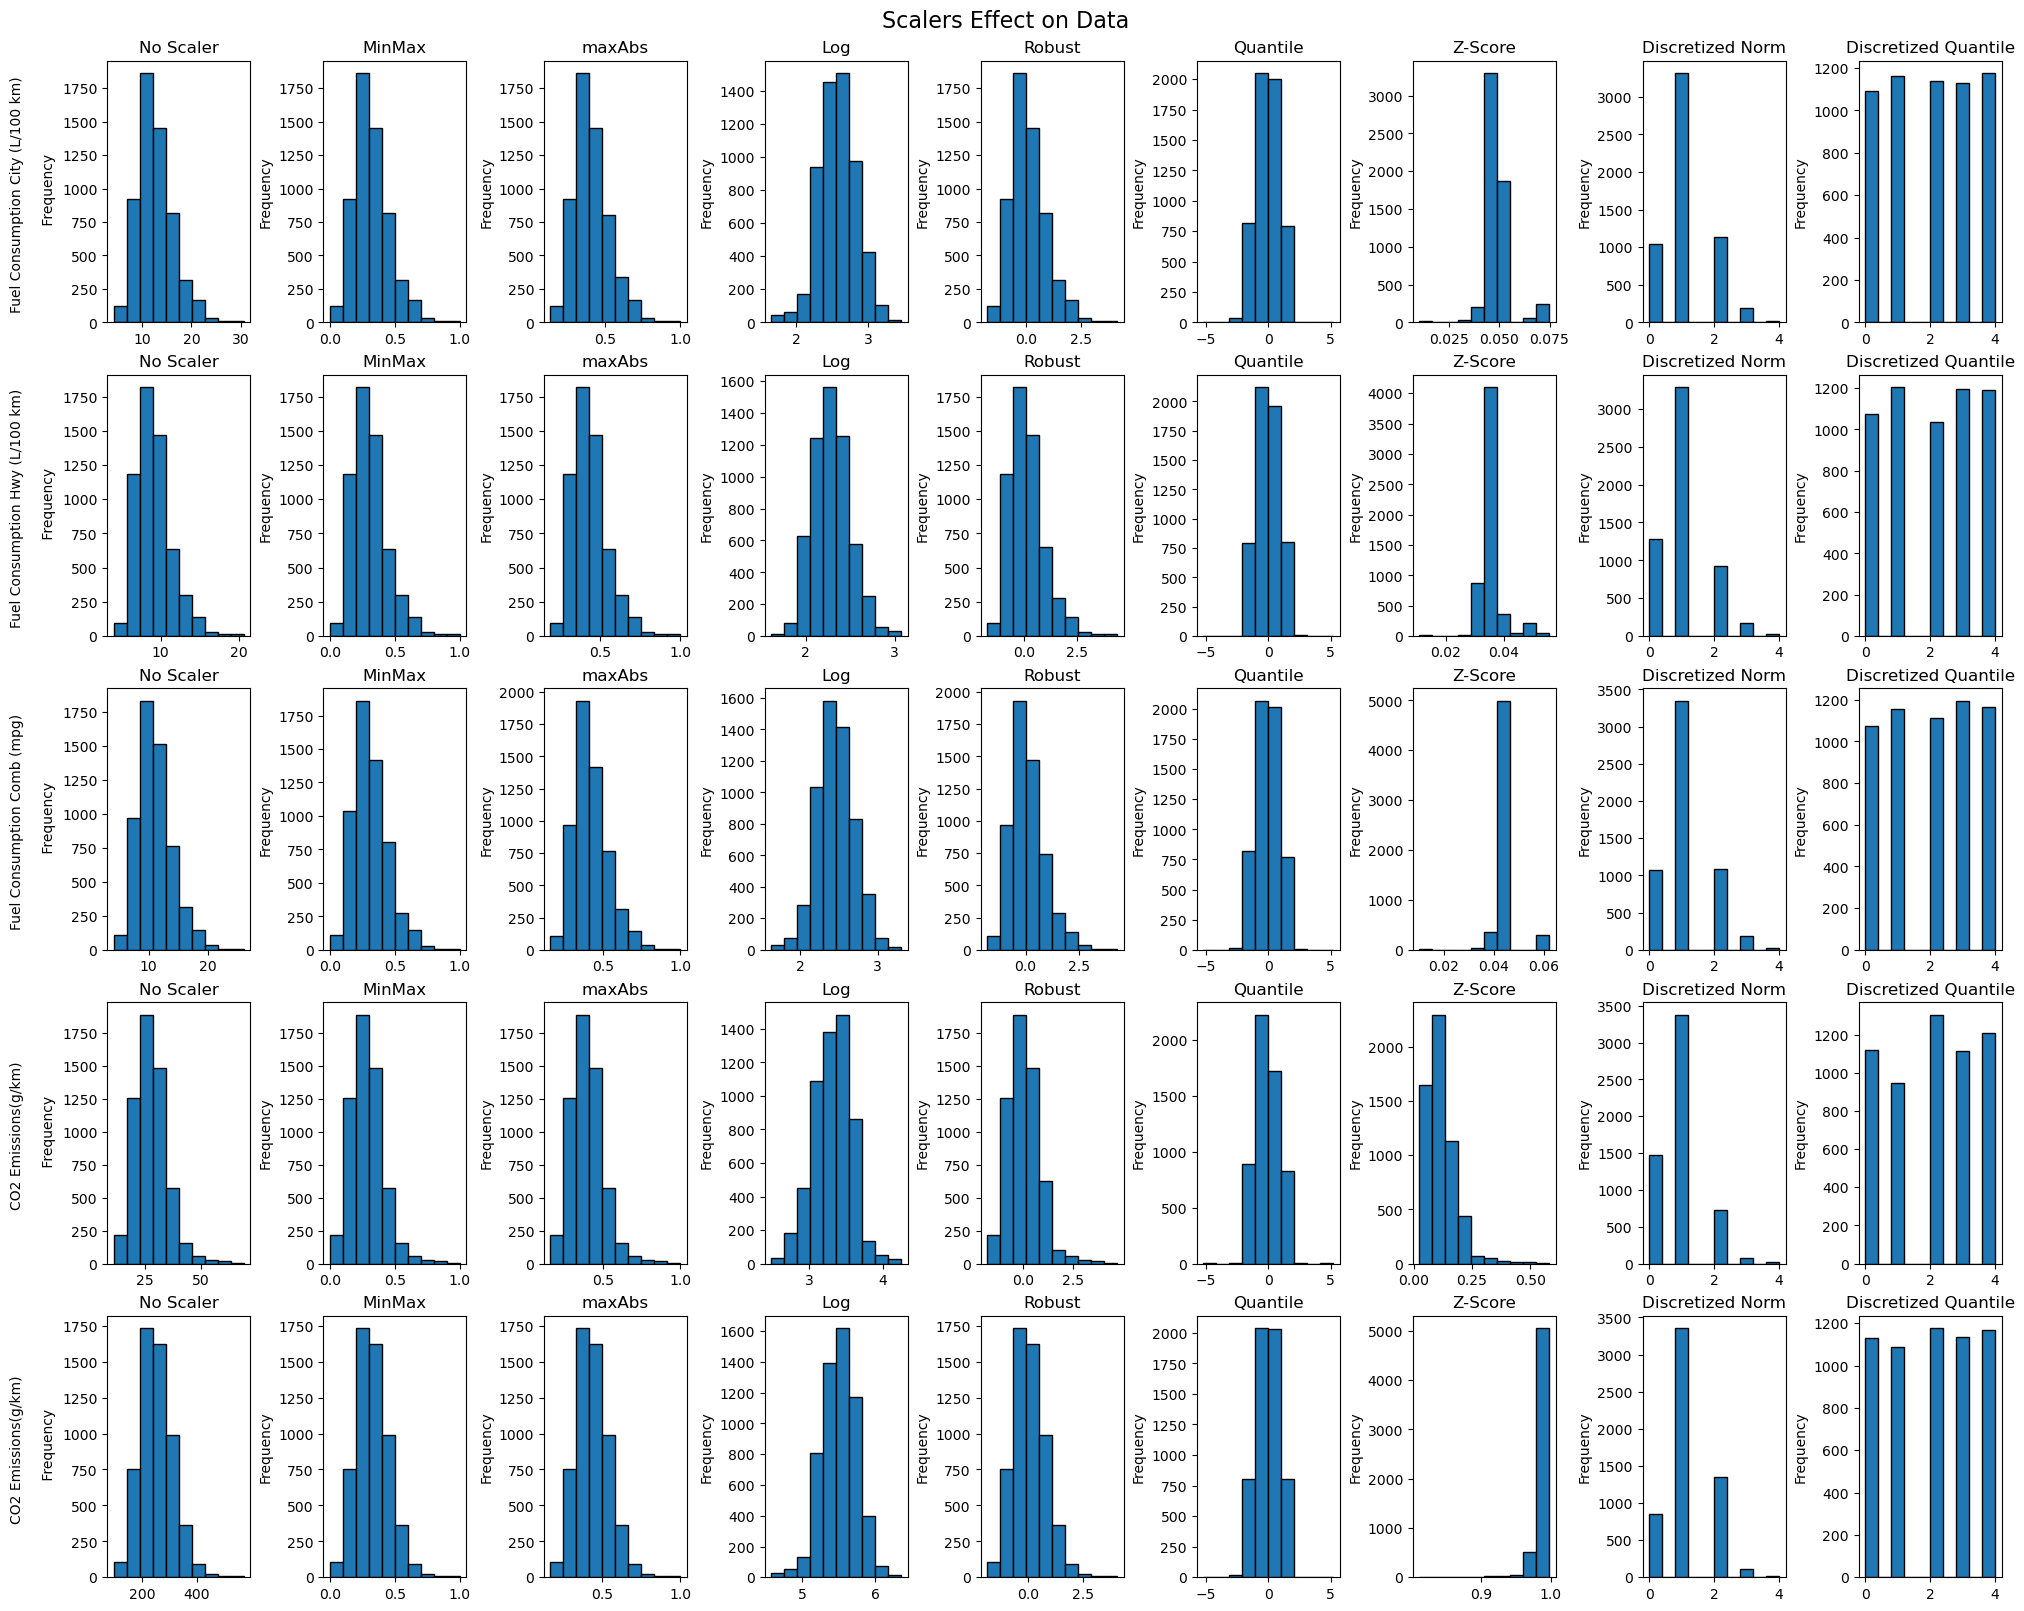

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder 

minMaxScaler = MinMaxScaler()
maxAbsScaler = MaxAbsScaler()
logScaler = FunctionTransformer(np.log1p)
robustScaler = RobustScaler()
quantileScaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
normScaler = Normalizer()
discretizerUniform = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretizerQuantile = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

#A one hot encoding of the categorical data
ohe = OneHotEncoder() 
df_ohe = df.copy()
categorical_cols = ['Make','Model','Vehicle Class','Transmission','Fuel Type']
df_ohe = pd.get_dummies(df_ohe, columns=categorical_cols)

# Min/Max scaling
df_minMax_scaled = df_ohe.copy()
cols_to_scale_minMax = df_minMax_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
cols_to_scale_minMax = minMaxScaler.fit_transform(cols_to_scale_minMax)
df_minMax_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_minMax

# MaxAbs scaling
df_maxAbs_scaled = df_ohe.copy()
cols_to_scale_maxAbs = df_maxAbs_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_maxAbs = maxAbsScaler.fit_transform(cols_to_scale_maxAbs)
df_maxAbs_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_maxAbs

# log scaling
df_log_scaled = df_ohe.copy()
cols_to_scale_log = df_log_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_log = logScaler.fit_transform(cols_to_scale_log)
df_log_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']] = cols_to_scale_log

# Robust scaling
df_robust_scaled = df_ohe.copy()
cols_to_scale_robust = df_robust_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_robust = robustScaler.fit_transform(cols_to_scale_robust)
df_robust_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_robust

# Quantile scaling
df_quantile_scaled = df_ohe.copy()
cols_to_scale_quantile = df_quantile_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_quantile = quantileScaler.fit_transform(cols_to_scale_quantile)
df_quantile_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_quantile

# Normalizer scaling
df_norm_scaled = df_ohe.copy()
cols_to_scale_norm = df_norm_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_norm = normScaler.fit_transform(cols_to_scale_norm)
df_norm_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_norm

# discretized uniform scaling
df_discNorm_scaled = df_ohe.copy()
cols_to_scale_discNorm = df_discNorm_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_discNorm = discretizerUniform.fit_transform(cols_to_scale_discNorm)
df_discNorm_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_discNorm

# discretized quantile scaling
df_discQuantile_scaled = df_ohe.copy()
cols_to_scale_discQuantile = df_discQuantile_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cols_to_scale_discQuantile = discretizerQuantile.fit_transform(cols_to_scale_discQuantile)
df_discQuantile_scaled[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = cols_to_scale_discQuantile


fig, axs = plt.subplots(5,9,figsize=(20,16),constrained_layout=True)
fig.suptitle('Scalers Effect on Data', fontsize=16)

#plotting no scaler
df.plot.hist(y=7, legend=None, ax=axs[0,0], ec='k', title = 'No Scaler')
df.plot.hist(y=8,legend=None, ax=axs[1,0], ec='k', title = 'No Scaler')
df.plot.hist(y=9, legend=None, ax=axs[2,0], ec='k', title = 'No Scaler')
df.plot.hist(y=10, legend=None, ax=axs[3,0], ec='k', title = 'No Scaler')
df.plot.hist(y=11,legend=None, ax=axs[4,0], ec='k', title = 'No Scaler')

#Set y axis labels
axs[0,0].set_ylabel('Fuel Consumption City (L/100 km) \n \n Frequency')
axs[1,0].set_ylabel('Fuel Consumption Hwy (L/100 km) \n \n Frequency')
axs[2,0].set_ylabel('Fuel Consumption Comb (L/100) \n \n Frequency')
axs[3,0].set_ylabel('Fuel Consumption Comb (mpg) \n \n Frequency')
axs[4,0].set_ylabel('CO2 Emissions(g/km) \n \n Frequency')

#plotting minMax scaled
df_minMax_scaled.plot.hist(y=2,legend=None, ax=axs[0,1], ec='k', title = 'MinMax')
df_minMax_scaled.plot.hist(y=3,legend=None, ax=axs[1,1], ec='k', title = 'MinMax')
df_minMax_scaled.plot.hist(y=4,legend=None, ax=axs[2,1], ec='k', title = 'MinMax')
df_minMax_scaled.plot.hist(y=5,legend=None, ax=axs[3,1], ec='k', title = 'MinMax')
df_minMax_scaled.plot.hist(y=6,legend=None, ax=axs[4,1], ec='k', title = 'MinMax')

#plotting maxAbs scaled
df_maxAbs_scaled.plot.hist(y=2,legend=None, ax=axs[0,2], ec='k', title = 'maxAbs')
df_maxAbs_scaled.plot.hist(y=3,legend=None, ax=axs[1,2], ec='k', title = 'maxAbs')
df_maxAbs_scaled.plot.hist(y=4,legend=None, ax=axs[2,2], ec='k', title = 'maxAbs')
df_maxAbs_scaled.plot.hist(y=5,legend=None, ax=axs[3,2], ec='k', title = 'maxAbs')
df_maxAbs_scaled.plot.hist(y=6,legend=None, ax=axs[4,2], ec='k', title = 'maxAbs')

#plotting log scaled
df_log_scaled.plot.hist(y=2,legend=None, ax=axs[0,3], ec='k', title = 'Log')
df_log_scaled.plot.hist(y=3,legend=None, ax=axs[1,3], ec='k', title = 'Log')
df_log_scaled.plot.hist(y=4,legend=None, ax=axs[2,3], ec='k', title = 'Log')
df_log_scaled.plot.hist(y=5,legend=None, ax=axs[3,3], ec='k', title = 'Log')
df_log_scaled.plot.hist(y=6,legend=None, ax=axs[4,3], ec='k', title = 'Log')

#plotting robust
df_robust_scaled.plot.hist(y=2,legend=None, ax=axs[0,4], ec='k', title = 'Robust')
df_robust_scaled.plot.hist(y=3,legend=None, ax=axs[1,4], ec='k', title = 'Robust')
df_robust_scaled.plot.hist(y=4,legend=None, ax=axs[2,4], ec='k', title = 'Robust')
df_robust_scaled.plot.hist(y=5,legend=None, ax=axs[3,4], ec='k', title = 'Robust')
df_robust_scaled.plot.hist(y=6,legend=None, ax=axs[4,4], ec='k', title = 'Robust')

#plotting Quantile
df_quantile_scaled.plot.hist(y=2,legend=None, ax=axs[0,5], ec='k', title = 'Quantile')
df_quantile_scaled.plot.hist(y=3,legend=None, ax=axs[1,5], ec='k', title = 'Quantile')
df_quantile_scaled.plot.hist(y=4,legend=None, ax=axs[2,5], ec='k', title = 'Quantile')
df_quantile_scaled.plot.hist(y=5,legend=None, ax=axs[3,5], ec='k', title = 'Quantile')
df_quantile_scaled.plot.hist(y=6,legend=None, ax=axs[4,5], ec='k', title = 'Quantile')

#plotting Z-Score
df_norm_scaled.plot.hist(y=2,legend=None, ax=axs[0,6], ec='k', title = 'Z-Score')
df_norm_scaled.plot.hist(y=3,legend=None, ax=axs[1,6], ec='k', title = 'Z-Score')
df_norm_scaled.plot.hist(y=4,legend=None, ax=axs[2,6], ec='k', title = 'Z-Score')
df_norm_scaled.plot.hist(y=5,legend=None, ax=axs[3,6], ec='k', title = 'Z-Score')
df_norm_scaled.plot.hist(y=6,legend=None, ax=axs[4,6], ec='k', title = 'Z-Score')

#plotting discNorm
df_discNorm_scaled.plot.hist(y=2,legend=None, ax=axs[0,7], ec='k', title = 'Discretized Norm')
df_discNorm_scaled.plot.hist(y=3,legend=None, ax=axs[1,7], ec='k', title = 'Discretized Norm')
df_discNorm_scaled.plot.hist(y=4,legend=None, ax=axs[2,7], ec='k', title = 'Discretized Norm')
df_discNorm_scaled.plot.hist(y=5,legend=None, ax=axs[3,7], ec='k', title = 'Discretized Norm')
df_discNorm_scaled.plot.hist(y=6,legend=None, ax=axs[4,7], ec='k', title = 'Discretized Norm')

#plotting discQuantile
df_discQuantile_scaled.plot.hist(y=2,legend=None, ax=axs[0,8], ec='k', title = 'Discretized Quantile')
df_discQuantile_scaled.plot.hist(y=3,legend=None, ax=axs[1,8], ec='k', title = 'Discretized Quantile')
df_discQuantile_scaled.plot.hist(y=4,legend=None, ax=axs[2,8], ec='k', title = 'Discretized Quantile')
df_discQuantile_scaled.plot.hist(y=5,legend=None, ax=axs[3,8], ec='k', title = 'Discretized Quantile')
df_discQuantile_scaled.plot.hist(y=6,legend=None, ax=axs[4,8], ec='k', title = 'Discretized Quantile')

display(df_log_scaled)